# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Indah Febri
- **Email:** findah212@gmail.com
- **ID Dicoding:** febriouz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
- Apa hubungan antara hari kerja dan akhir pekan dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
# Memuat data CSV yang sudah di-upload
hour_df = pd.read_csv('hour.csv')  # Ganti nama file sesuai dengan file yang di-upload
day_df = pd.read_csv('day.csv')    # Ganti nama file sesuai dengan file yang di-upload

# Menampilkan beberapa baris pertama dari kedua dataset untuk pengecekan
print("First few rows of hour.csv:")
print(hour_df.head())

print("\nFirst few rows of day.csv:")
print(day_df.head())

# Menampilkan informasi umum tentang kedua dataset
print("\nInformation about hour.csv:")
hour_df.info()

print("\nInformation about day.csv:")
day_df.info()

First few rows of hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

First few rows of day.csv:
   instant      dteday  season  yr  mnth  h

**Insight:**

-Dataset hour.csv memberikan data per jam, cocok untuk analisis lebih mendalam tentang pengaruh cuaca dan hari kerja.



-Dataset day.csv memberi gambaran per hari, berguna untuk tren jangka panjang dan analisis musiman.


### Assessing Data

In [6]:
# Memuat data CSV
hour_df = pd.read_csv('hour.csv')  # Pastikan nama file sesuai dengan yang di-upload
day_df = pd.read_csv('day.csv')    # Pastikan nama file sesuai dengan yang di-upload

# Menampilkan beberapa baris pertama dari kedua dataset untuk pengecekan
print("First few rows of hour.csv:")
print(hour_df.head())

print("\nFirst few rows of day.csv:")
print(day_df.head())

# Menampilkan informasi umum tentang kedua dataset (jumlah baris, kolom, tipe data)
print("\nInformation about hour.csv:")
hour_df.info()

print("\nInformation about day.csv:")
day_df.info()

# Mengecek apakah ada nilai yang hilang (missing values)
print("\nMissing values in hour.csv:")
print(hour_df.isnull().sum())

print("\nMissing values in day.csv:")
print(day_df.isnull().sum())

First few rows of hour.csv:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

First few rows of day.csv:
   instant      dteday  season  yr  mnth  h

**Insight:**


- Data sudah siap untuk eksplorasi lebih lanjut dengan visualisasi dan analisis statistik guna menjawab pertanyaan bisnis tentang pengaruh cuaca dan hari kerja/akhir pekan terhadap jumlah penyewaan sepeda.


### Cleaning Data

In [8]:
# Memuat data CSV
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

# 1. Mengonversi kolom dteday menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# 2. Membuat kolom 'day_of_week' untuk kemudahan analisis berdasarkan hari
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

# 3. Menghapus kolom yang tidak diperlukan (misalnya, 'instant')
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

# 4. Menambahkan kolom 'day_type' untuk analisis hari kerja dan akhir pekan
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

# 5. Memeriksa data setelah pembersihan
print("\nFirst few rows of cleaned hour.csv:")
print(hour_df.head())

print("\nFirst few rows of cleaned day.csv:")
print(day_df.head())

# 6. Menyimpan dataset yang sudah dibersihkan ke file baru (opsional)
hour_df.to_csv('cleaned_hour.csv', index=False)
day_df.to_csv('cleaned_day.csv', index=False)


First few rows of cleaned hour.csv:
      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2011-01-01       1   0     1   0        0        6           0           1   
1 2011-01-01       1   0     1   1        0        6           0           1   
2 2011-01-01       1   0     1   2        0        6           0           1   
3 2011-01-01       1   0     1   3        0        6           0           1   
4 2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt day_of_week  \
0  0.24  0.2879  0.81        0.0       3          13   16    Saturday   
1  0.22  0.2727  0.80        0.0       8          32   40    Saturday   
2  0.22  0.2727  0.80        0.0       5          27   32    Saturday   
3  0.24  0.2879  0.75        0.0       3          10   13    Saturday   
4  0.24  0.2879  0.75        0.0       0           1    1    Saturday   

      day_type  
0  Akhir Pekan  
1  Akhir 

**Insight:**

- Setelah proses pembersihan data, dataset ini siap untuk dianalisis lebih lanjut untuk menjawab pertanyaan tentang pengaruh cuaca dan hubungan antara hari kerja dan akhir pekan terhadap jumlah penyewaan sepeda.

- Selanjutnya, visualisasi dan analisis statistik dapat digunakan untuk menggali lebih dalam hubungan antara faktor-faktor ini dan jumlah penyewaan sepeda.

## Exploratory Data Analysis (EDA)

###  EDA untuk Statistik Deskriptif untuk cnt berdasarkan weathersit

In [10]:
# Menghitung statistik deskriptif untuk jumlah penyewaan sepeda (cnt) berdasarkan cuaca
weather_group = hour_df.groupby('weathersit')['cnt'].describe()
print("\nStatistik Deskriptif Jumlah Penyewaan Sepeda berdasarkan Cuaca:")
print(weather_group)



Statistik Deskriptif Jumlah Penyewaan Sepeda berdasarkan Cuaca:
              count        mean         std   min   25%    50%    75%    max
weathersit                                                                  
1           11413.0  204.869272  189.487773   1.0  46.0  159.0  304.0  977.0
2            4544.0  175.165493  165.431589   1.0  40.0  133.0  257.0  957.0
3            1419.0  111.579281  133.781045   1.0  21.0   63.0  152.5  891.0
4               3.0   74.333333   77.925178  23.0  29.5   36.0  100.0  164.0


**Insight:**
- Untuk meningkatkan jumlah penyewaan sepeda, strategi promosi atau peningkatan layanan bisa lebih difokuskan pada cuaca cerah dan mengurangi faktor-faktor yang menghalangi penyewaan saat cuaca buruk atau ekstrem.

###  EDA untuk Hitung rata-rata penyewaan sepeda untuk hari kerja dan akhir pekan.

In [11]:
# Rata-rata penyewaan sepeda berdasarkan hari kerja vs akhir pekan
avg_day_type = hour_df.groupby('day_type')['cnt'].mean()
print("\nRata-rata Penyewaan Sepeda berdasarkan Hari Kerja vs. Akhir Pekan:")
print(avg_day_type)



Rata-rata Penyewaan Sepeda berdasarkan Hari Kerja vs. Akhir Pekan:
day_type
Akhir Pekan    181.405332
Hari Kerja     193.207754
Name: cnt, dtype: float64


**Insight:**
- Untuk akhir pekan, strategi pemasaran atau promosi mungkin perlu disesuaikan untuk menarik lebih banyak pengguna, misalnya dengan menawarkan diskon atau paket keluarga yang dapat memotivasi orang untuk menggunakan sepeda pada waktu luang mereka.

###  EDA untuk Perhitungan Rata-rata Penyewaan Sepeda berdasarkan Cuaca

In [12]:
# Rata-rata penyewaan sepeda berdasarkan cuaca
avg_weather = hour_df.groupby('weathersit')['cnt'].mean()
print("\nRata-rata Penyewaan Sepeda berdasarkan Cuaca:")
print(avg_weather)



Rata-rata Penyewaan Sepeda berdasarkan Cuaca:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


**Insight**
- Cuaca cerah mendukung peningkatan penyewaan sepeda, sementara cuaca buruk (hujan lebat atau ekstrem) sangat menghambat penggunaan sepeda. Meskipun cuaca mendung atau hujan ringan masih menghasilkan penyewaan, itu jauh lebih rendah dibandingkan dengan cuaca cerah.

 ###  EDA untuk Melihat apakah variabel lain seperti suhu (temp), kelembaban (hum), atau kecepatan angin (windspeed) berhubungan dengan jumlah penyewaan sepeda.

In [13]:
# Matriks korelasi antara variabel numerik
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
print("\nMatriks Korelasi antara Variabel Numerik:")
print(correlation_matrix)



Matriks Korelasi antara Variabel Numerik:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.987672 -0.069881  -0.023125  0.404772
atemp      0.987672  1.000000 -0.051918  -0.062336  0.400929
hum       -0.069881 -0.051918  1.000000  -0.290105 -0.322911
windspeed -0.023125 -0.062336 -0.290105   1.000000  0.093234
cnt        0.404772  0.400929 -0.322911   0.093234  1.000000


**Insight**
- Fokuskan promosi pada hari dengan suhu tinggi dan kelembaban rendah untuk meningkatkan penyewaan sepeda.

###  EDA untuk Hitung rata-rata jumlah penyewaan sepeda berdasarkan bulan.

In [14]:
# Rata-rata penyewaan sepeda berdasarkan bulan
avg_month = day_df.groupby('mnth')['cnt'].mean()
print("\nRata-rata Penyewaan Sepeda berdasarkan Bulan:")
print(avg_month)



Rata-rata Penyewaan Sepeda berdasarkan Bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
Name: cnt, dtype: float64


**Insight**
- Fokuskan promosi dan layanan penyewaan sepeda pada bulan-bulan musim panas (Mei hingga Agustus) untuk memaksimalkan penyewaan.

###  EDA untuk Hitung rata-rata jumlah penyewaan sepeda berdasarkan musim.

In [15]:
# Rata-rata penyewaan sepeda berdasarkan musim
avg_season = day_df.groupby('season')['cnt'].mean()
print("\nRata-rata Penyewaan Sepeda berdasarkan Musim:")
print(avg_season)



Rata-rata Penyewaan Sepeda berdasarkan Musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


**Insight**
- Fokuskan promosi dan layanan pada musim panas dan musim semi untuk meningkatkan penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-19-2a9de80ccc95>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_weather, x='weathersit', y='cnt', palette='Blues_d')


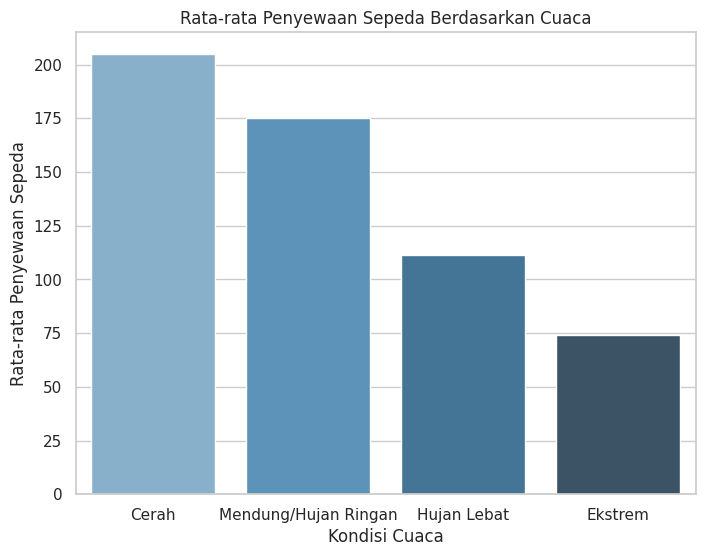

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca
avg_weather = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mengatur kategori cuaca agar lebih mudah dipahami
weather_labels = {1: 'Cerah', 2: 'Mendung/Hujan Ringan', 3: 'Hujan Lebat', 4: 'Ekstrem'}
avg_weather['weathersit'] = avg_weather['weathersit'].map(weather_labels)

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_weather, x='weathersit', y='cnt', palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


### Pertanyaan 2:Apa hubungan antara hari kerja dan akhir pekan dengan jumlah penyewaan sepeda?

<ipython-input-20-fb7df85eb793>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_day_type, x='day_type', y='cnt', palette='muted')


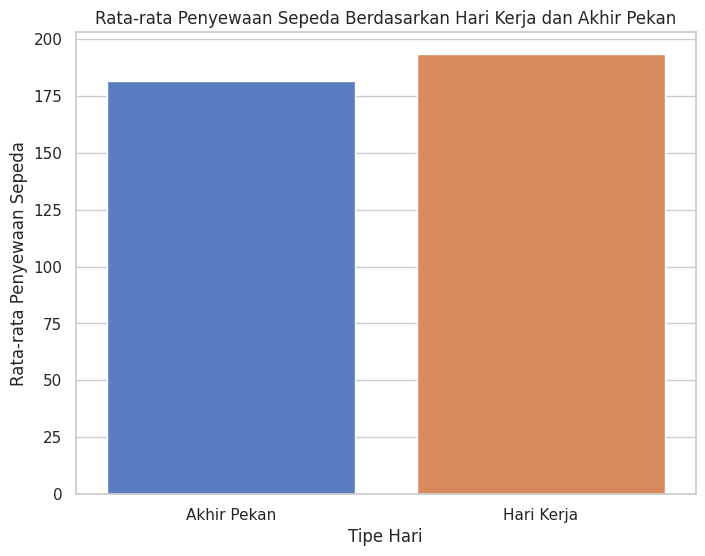

In [20]:
# Menghitung rata-rata penyewaan sepeda berdasarkan tipe hari
avg_day_type = hour_df.groupby('day_type')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_day_type, x='day_type', y='cnt', palette='muted')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


**Insight:**
- Jumlah penyewaan sepeda menurun seiring memburuknya kondisi cuaca. Cuaca cerah mendorong aktivitas penyewaan tertinggi, sementara cuaca hujan lebat dan ekstrem sangat menghambat penyewaan.
- Jumlah penyewaan sepeda sedikit lebih tinggi pada Hari Kerja, yang menunjukkan penggunaan sepeda lebih banyak untuk keperluan transportasi rutin dibandingkan aktivitas rekreasi pada Akhir Pekan. Namun, kedua tipe hari memiliki pola distribusi yang mirip dengan beberapa outlier di tingkat penyewaan tinggi.

## Conclusion

- Conclution pertanyaan 1 : Cuaca cerah dan Hari Kerja merupakan faktor utama yang mendorong peningkatan jumlah penyewaan sepeda.
- Conclution pertanyaan 2 : Penyewaan sepeda berkurang pada cuaca buruk dan Akhir Pekan, yang mungkin dipengaruhi oleh kenyamanan dan tujuan penggunaan sepeda.